# Employee Churn

In [34]:
#the basics
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

#sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

#Bayes
from sklearn.naive_bayes import GaussianNB

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#NN
from keras.models import Sequential
from keras.layers import Dense

#MLXTEND
from mlxtend.plotting import plot_confusion_matrix

#Scikit
import scikitplot as skplt

# ------------------Cleaning------------------

In [11]:
df_raw = pd.read_csv('EmployeeData.csv')
df_raw.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Check & Remove any Null Values

In [12]:
df = df_raw.dropna()

#### There are no null values to remove

## Check and Remove Outliers

In [13]:
def plot_boxplot(df, feature):
    print(feature)
    df.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

satisfaction_level


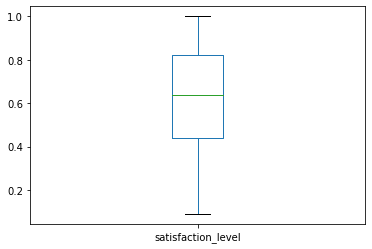

last_evaluation


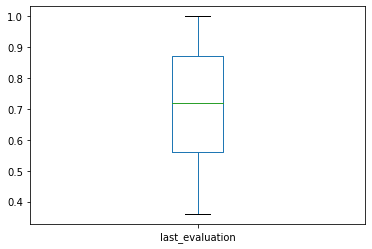

number_project


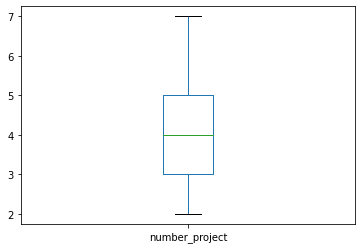

average_montly_hours


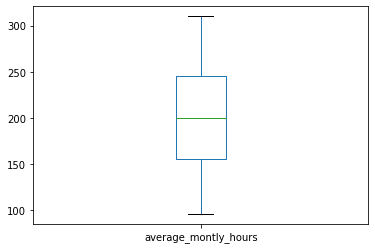

time_spend_company


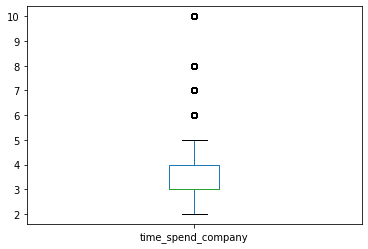

In [14]:
#boxplots for all of our numerical values
plot_boxplot(df, 'satisfaction_level')
plot_boxplot(df, 'last_evaluation')
plot_boxplot(df, 'number_project')
plot_boxplot(df, 'average_montly_hours')
plot_boxplot(df, 'time_spend_company')

#### Overall I feel the outliers present in 'time_spend_company' were relevant ans should stay in the data for us to analyze

### Change categorical to numerical

In [15]:
#Encode categotical variable
datacat = df.select_dtypes(exclude=["number"])
LE=LabelEncoder()
for i in datacat:
    df[i]=df[[i]].apply(LE.fit_transform)

In [16]:
orig = df
target = df['left']
df = df.drop(['left'], axis =1)

In [17]:
#This is the numerical dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


 # ----------------------------EDA----------------------------

In [18]:
#color palette
pal = ['#0f39f7', '#fcf00a']
b = '#0f39f7'
y = '#fcf00a'

In [19]:
list(orig.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [20]:
orig.shape

(14999, 10)

In [139]:
orig.replace((1, 0), ('left', 'stayed'), inplace=True)

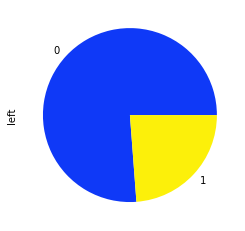

In [21]:
orig['left'].value_counts().plot.pie( colors = pal)
plt.show()

In [22]:
orig.replace(('left', 'stayed'), (1,0), inplace=True)
g = orig.groupby(['left'])
c1 = g.get_group(1)
c2 = g.get_group(0)

In [23]:
def compare(df, ft):
    sns.distplot(c1[ft], color = y, hist=False)
    sns.distplot(c2[ft], color = b, hist=False)
    plt.legend(labels=["left","stayed"])
    plt.show()

/tmp/ipykernel_218/1784404461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
/tmp/ipykernel_218/1784404461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


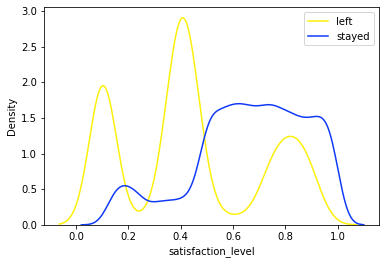

/tmp/ipykernel_218/1784404461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
/tmp/ipykernel_218/1784404461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


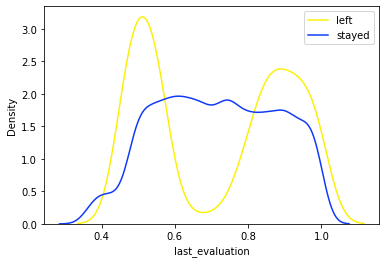

/tmp/ipykernel_218/1784404461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
/tmp/ipykernel_218/1784404461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


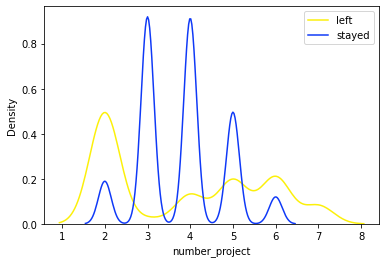

/tmp/ipykernel_218/1784404461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
/tmp/ipykernel_218/1784404461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


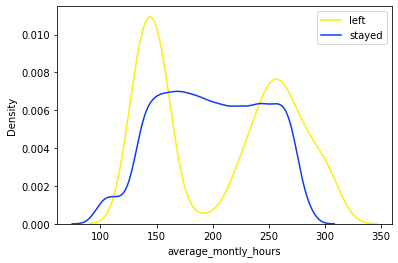

/tmp/ipykernel_218/1784404461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
/tmp/ipykernel_218/1784404461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


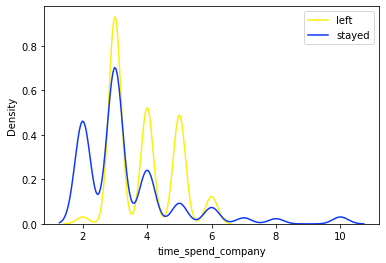

/tmp/ipykernel_218/1784404461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
/tmp/ipykernel_218/1784404461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


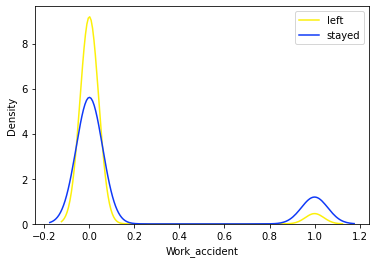

/tmp/ipykernel_218/1784404461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
/home/erdenzehra/.local/lib/python3.10/site-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipykernel_218/1784404461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for k

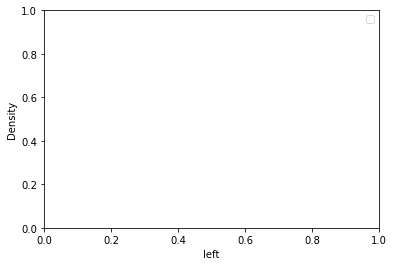

/tmp/ipykernel_218/1784404461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
/tmp/ipykernel_218/1784404461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


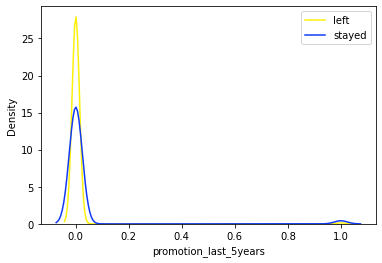

/tmp/ipykernel_218/1784404461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
/tmp/ipykernel_218/1784404461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


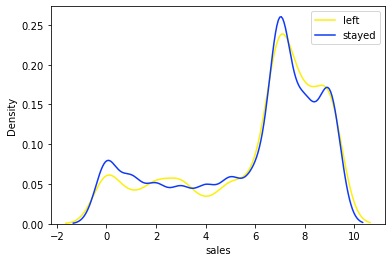

/tmp/ipykernel_218/1784404461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
/tmp/ipykernel_218/1784404461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


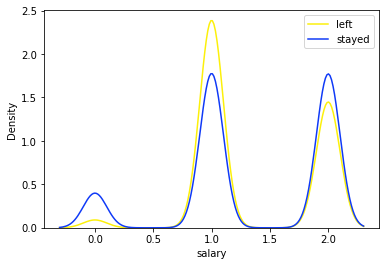

In [24]:
for feature in orig:
    compare(orig, feature)

## Correlation

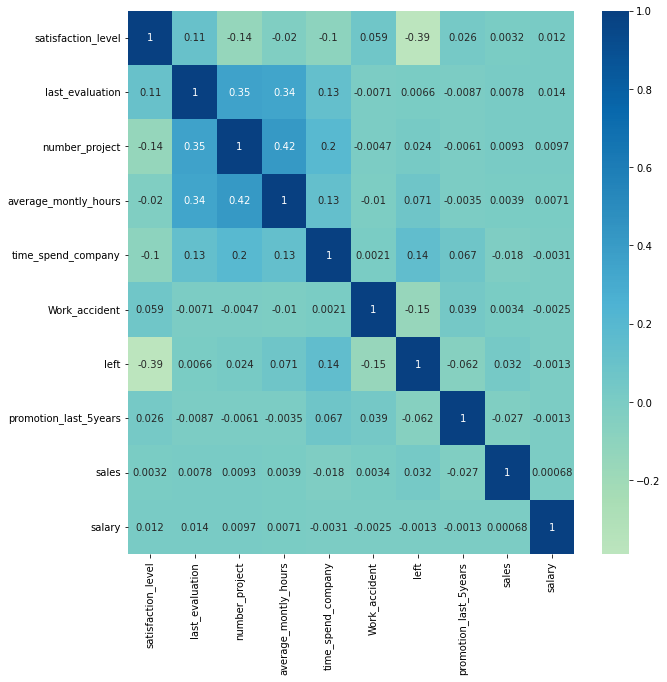

In [25]:
corrmat= orig.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True,cmap = 'GnBu', center=0)
plt.show()

# -----------------------MODELS-----------------------

### Prepping for models

In [26]:
#Label predictive variable and remove from orig dataset & convert to np array
y = np.array(target)
X = np.array(df)
feature_list = list(df.columns)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## KNN

In [29]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [30]:
y_pred = knn.predict(X_test)

In [31]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3369   69]
 [ 108  954]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3438
           1       0.93      0.90      0.92      1062

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



Text(0.5, 1.0, 'ROC Curves - K-Nearest Neighbors')

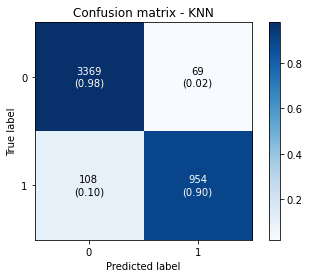

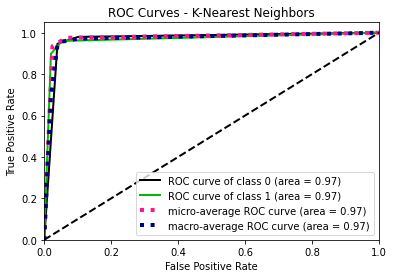

In [33]:
knn_model = knn.fit(X_train, y_train)
knn_y_model = knn_model.predict(X=X_test)
knn_y_prob = knn_model.predict_proba(X=X_test)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,knn_y_model),
                                show_absolute=True,show_normed=True,colorbar=True)
plt.title("Confusion matrix - KNN")
plt.ylabel('True label')
plt.xlabel('Predicted label')

plot = skplt.metrics.plot_roc(y_test, knn_y_prob)
plt.title("ROC Curves - K-Nearest Neighbors")

## Random Forest

In [35]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [36]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [37]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3369   69]
 [ 108  954]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3438
           1       0.93      0.90      0.92      1062

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



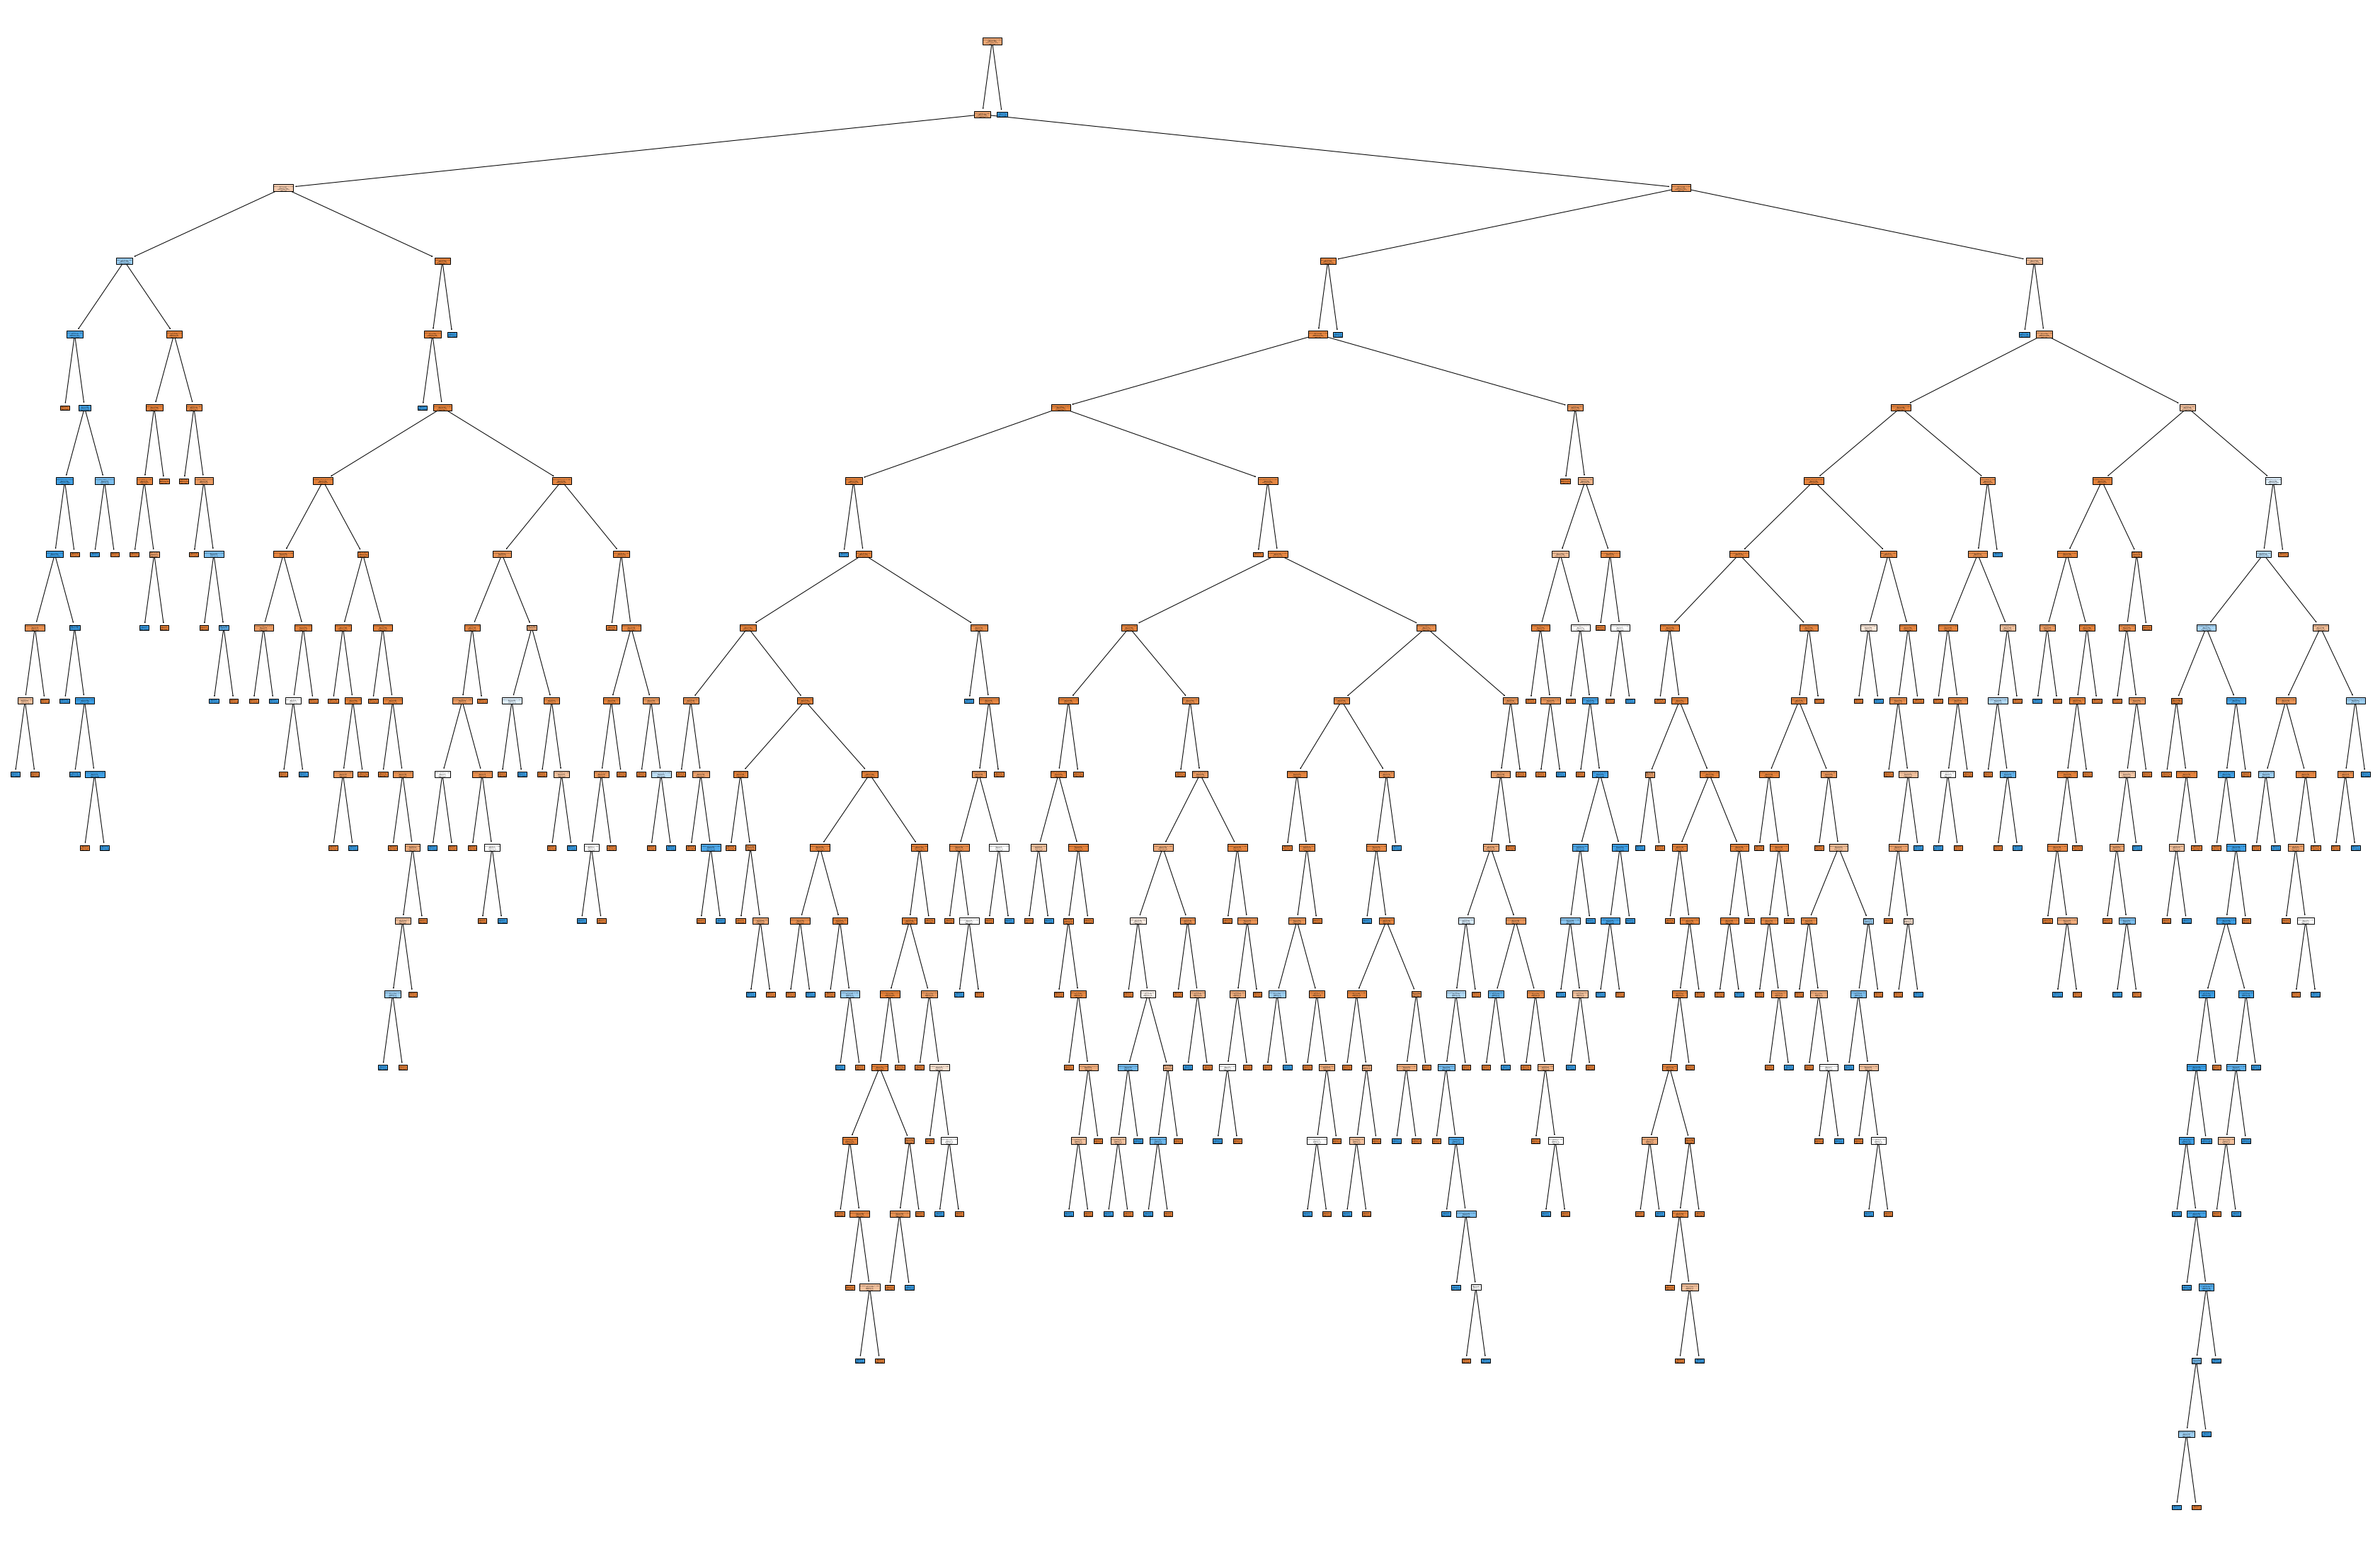

In [38]:
plt.figure(figsize=(60,40))
plot_tree(rfc.estimators_[5], feature_names = orig.columns,class_names=['left', "stayed"],filled=True);
plt.show()

In [39]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:19} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: satisfaction_level  Importance: 0.36
Variable: time_spend_company  Importance: 0.19
Variable: number_project      Importance: 0.16
Variable: average_montly_hours Importance: 0.15
Variable: last_evaluation     Importance: 0.12
Variable: Work_accident       Importance: 0.01
Variable: sales               Importance: 0.01
Variable: salary              Importance: 0.01
Variable: promotion_last_5years Importance: 0.0


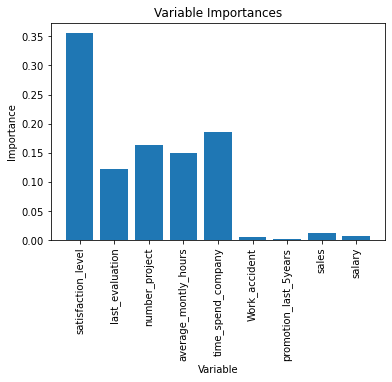

In [40]:
%matplotlib inline
x_values = range(len(importances))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Text(0.5, 1.0, 'ROC Curves - Random Forest Classifier')

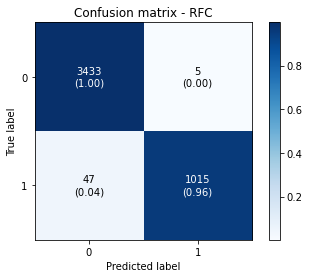

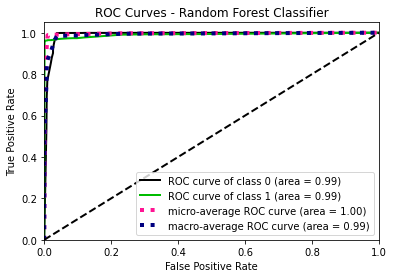

In [44]:
rfc_model = rfc.fit(X_train, y_train)
rfc_y_model = rfc_model.predict(X=X_test)
rfc_y_prob = rfc_model.predict_proba(X=X_test)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,rfc_y_model),
                                show_absolute=True,show_normed=True,colorbar=True)
plt.title("Confusion matrix - RFC")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plot = skplt.metrics.plot_roc(y_test, rfc_y_prob)
plt.title("ROC Curves - Random Forest Classifier")

## Naive Bayes

In [45]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [46]:
y_pred = GNB.predict(X_test)

In [47]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2771  667]
 [ 302  760]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      3438
           1       0.53      0.72      0.61      1062

    accuracy                           0.78      4500
   macro avg       0.72      0.76      0.73      4500
weighted avg       0.81      0.78      0.79      4500



Text(0.5, 1.0, 'ROC Curves - The Naïve Bayes')

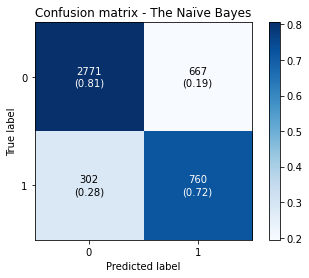

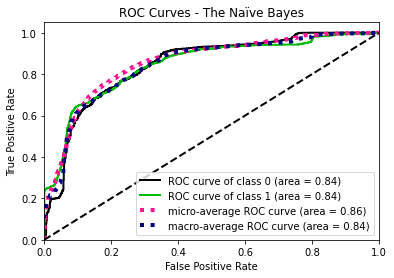

In [51]:
GNB_model = GNB.fit(X_train, y_train)
GNB_y_model = GNB_model.predict(X=X_test)
GNB_y_prob = GNB_model.predict_proba(X=X_test)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,GNB_y_model),
                                show_absolute=True,show_normed=True,colorbar=True)
plt.title("Confusion matrix - The Naïve Bayes")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plot = skplt.metrics.plot_roc(y_test, GNB_y_prob)
plt.title("ROC Curves - The Naïve Bayes")

## Logisitic Regression

In [52]:
# logistic regression model creation
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# predictions
lr_predict = lr.predict(X_test)

# evaluation
print(confusion_matrix(y_test, lr_predict))
print(classification_report(y_test, lr_predict))

[[3168  270]
 [ 774  288]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3438
           1       0.52      0.27      0.36      1062

    accuracy                           0.77      4500
   macro avg       0.66      0.60      0.61      4500
weighted avg       0.74      0.77      0.74      4500



Text(0.5, 1.0, 'ROC Curves - Logistic Regression')

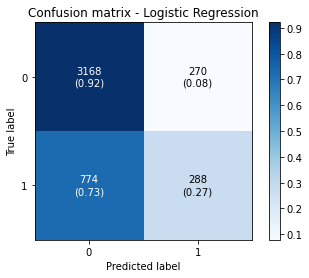

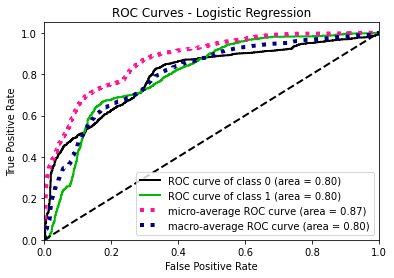

In [56]:
lr_model = lr.fit(X_train, y_train)
lr_y_model = lr_model.predict(X=X_test)
lr_y_prob = lr_model.predict_proba(X=X_test)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,lr_y_model),
                                show_absolute=True,show_normed=True,colorbar=True)
plt.title("Confusion matrix - Logistic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plot = skplt.metrics.plot_roc(y_test, lr_y_prob)
plt.title("ROC Curves - Logistic Regression")

## Neural Networks

In [75]:
# neural network model creation
nn = Sequential()
nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training
nn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# predictions
nn_prob = nn.predict(X_test)
nn_prob_2d = np.concatenate((1-nn_prob, nn_prob), axis=1)
nn_predict = (nn_prob > 0.5).astype(int)

# evaluation
print(confusion_matrix(y_test, nn_predict))
print(classification_report(y_test, nn_predict))

141/141 [==============================] - 0s 3ms/step
[[3397   41]
 [  97  965]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3438
           1       0.96      0.91      0.93      1062

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



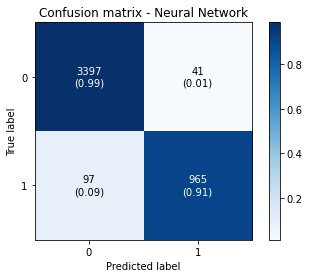

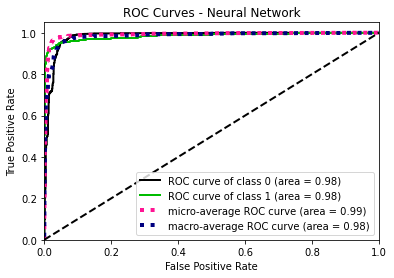

In [76]:
y_test = np.array(y_test).ravel()
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,nn_predict),
                                show_absolute=True,show_normed=True,colorbar=True)
plt.title("Confusion matrix - Neural Network")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plot = skplt.metrics.plot_roc(y_test, nn_prob_2d)
plt.title("ROC Curves - Neural Network")
plt.show()